In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## Line Plot

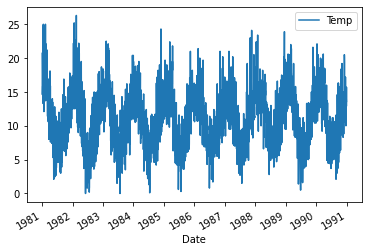

In [3]:
series.plot()
plt.show()

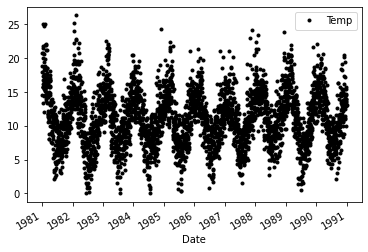

In [4]:
series.plot(style='k.')
plt.show()

In [5]:
groups = series.groupby(pd.Grouper(freq='A'))
groups

In [6]:
years = pd.DataFrame()

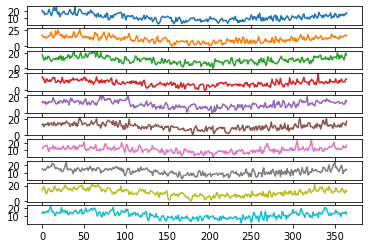

In [7]:
for name, group in groups:
    years[name.year] = group['Temp'].values
    
years.plot(subplots = True, legend = False)
plt.show()

## Histogram

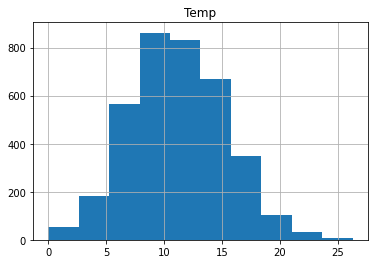

In [8]:
series.hist()
plt.show()

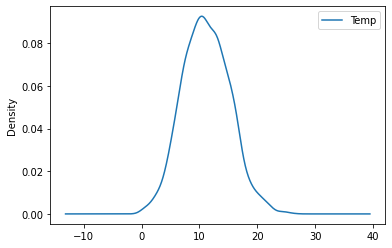

In [9]:
# Density
series.plot(kind='kde')
plt.show()

## Box and Whisker plots

For intervals

In [10]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

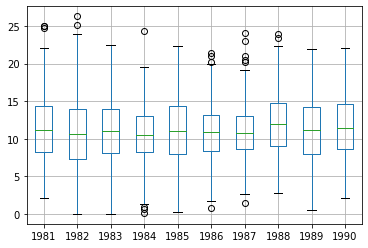

In [11]:
for name, group in groups:
    years[name.year] = group['Temp'].values
    
years.boxplot()
plt.show()

In [12]:
one_year = series.loc['1990']
one_year

,Temp
Date,
1990-01-01,14.8
1990-01-02,13.3
1990-01-03,15.6
1990-01-04,14.5
1990-01-05,14.3
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


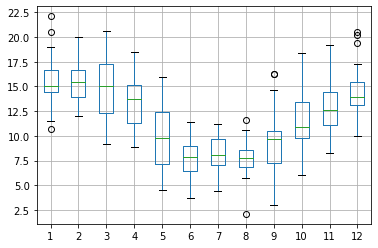

In [13]:
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months.columns = range(1,13)

months.boxplot()
plt.show()

## Heat Maps

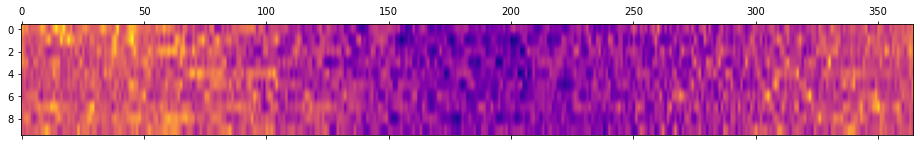

In [30]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group['Temp'].values
    
years = years.T

plt.matshow(years, interpolation=None, aspect='auto', cmap='plasma')
plt.show()